In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
sys.path.insert(0,'..')
from notebookFunctions import *
# from .. import notebookFunctions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [4]:
data = pd.read_excel("/Users/weilu/Downloads/TOP500_201711.xls")

In [35]:
data2 = pd.read_excel("/Users/weilu/Downloads/TOP500_201706.xls")

In [37]:
data3 = pd.read_excel("/Users/weilu/Downloads/TOP500_201611.xls")

In [9]:
data.columns

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Power Effeciency [GFlops/Watts]', 'Architecture',
       'Processor', 'Processor Technology', 'Processor Speed (MHz)',
       'Operating System', 'OS Family', 'Accelerator/Co-Processor',
       'Cores per Socket', 'Processor Generation', 'System Model',
       'System Family', 'Interconnect Family', 'Interconnect', 'Region',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

In [14]:
data[['Name', 'Rmax [TFlop/s]', 'Rpeak [TFlop/s]']]

,Name,Rmax [TFlop/s],Rpeak [TFlop/s]
0,Sunway TaihuLight,93014.59388,125435.9040
1,Tianhe-2 (MilkyWay-2),33862.70000,54902.4000
2,Piz Daint,19590.00000,25326.2640
3,Gyoukou,19135.80000,28192.0000
4,Titan,17590.00000,27112.5500
5,Sequoia,17173.22400,20132.6592
6,Trinity,14137.30000,43902.5660
7,Cori,14014.70000,27880.6530
8,Oakforest-PACS,13554.60000,24913.4590
9,NaN,10510.00000,11280.3840


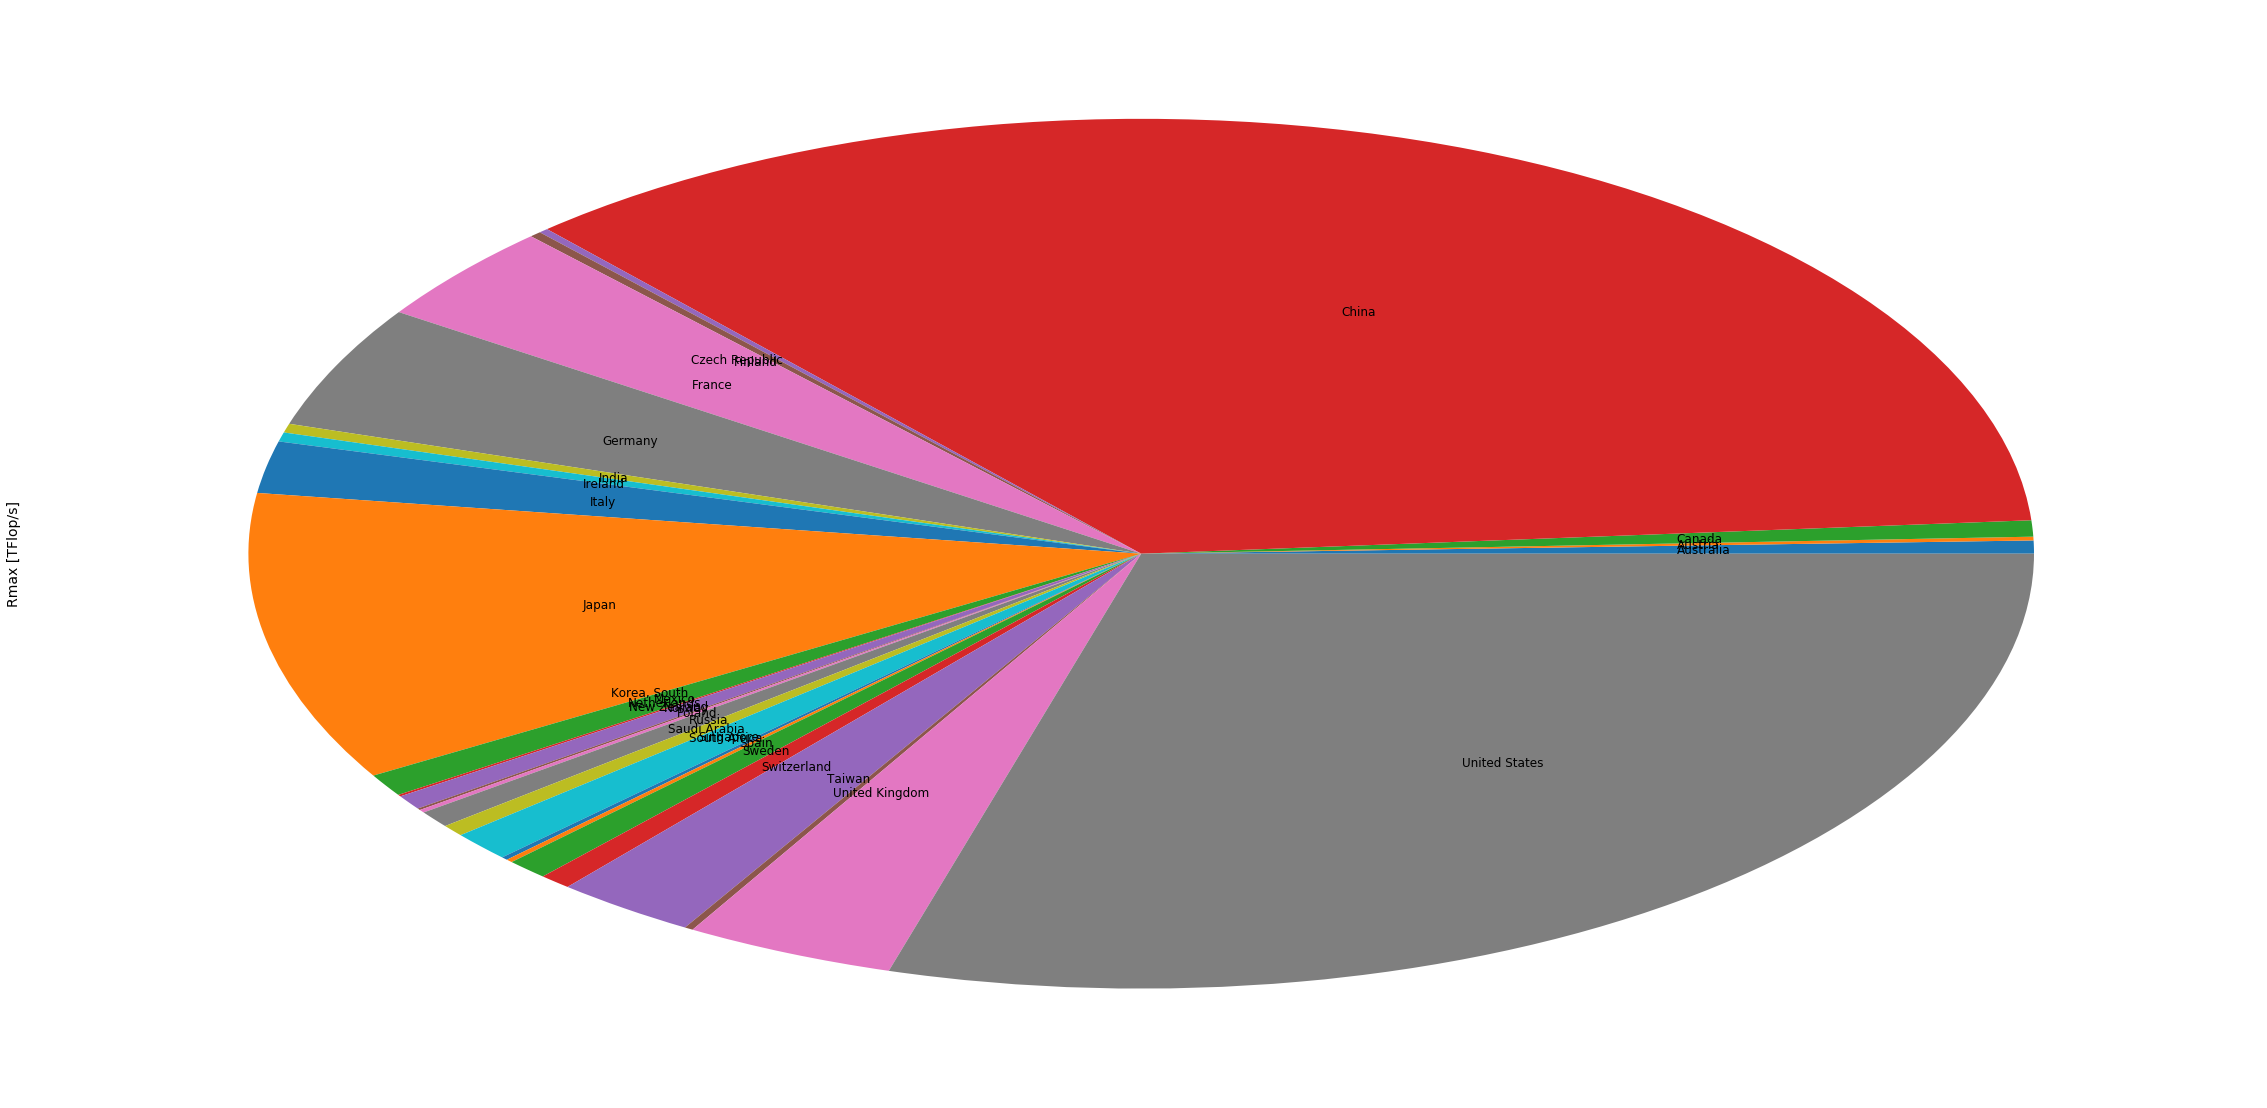

In [34]:
a = data.groupby("Country")['Rmax [TFlop/s]'].sum().plot.pie(figsize=(40,20), labeldistance=0.6)
plt.savefig('/Users/weilu/Desktop/test.png')

In [39]:
data.rename(columns={"Name":"Ntest"})

,Rank,Previous Rank,First Appearance,First Rank,Ntest,Computer,Site,Manufacturer,Country,Year,...,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Region,Continent,Site ID,System ID
0,1,1.0,47,1,Sunway TaihuLight,"Sunway MPP, Sunway SW26010 260C 1.45GHz, Sunway",National Supercomputing Center in Wuxi,NRCPC,China,2016,...,260,Sunway,Sunway MPP,Sunway Cluster,Custom Interconnect,Sunway,Eastern Asia,Asia,50623,178764
1,2,2.0,41,1,Tianhe-2 (MilkyWay-2),"TH-IVB-FEP Cluster, Intel Xeon E5-2692 12C 2.2...",National Super Computer Center in Guangzhou,NUDT,China,2013,...,12,Intel Xeon E5 (IvyBridge),TH-IVB-FEP Cluster,TH-IVB Cluster,Custom Interconnect,TH Express-2,Eastern Asia,Asia,50365,177999
2,3,3.0,40,114,Piz Daint,"Cray XC50, Xeon E5-2690v3 12C 2.6GHz, Aries in...",Swiss National Supercomputing Centre (CSCS),Cray Inc.,Switzerland,2017,...,12,Intel Xeon E5 (Haswell),Cray XC50,Cray XC,Custom Interconnect,Aries interconnect,Western Europe,Europe,50422,177824
3,4,69.0,49,69,Gyoukou,"ZettaScaler-2.2 HPC system, Xeon D-1571 16C 1....",Japan Agency for Marine-Earth Science and Tech...,ExaScaler,Japan,2017,...,16,Intel Xeon E5 (Broadwell),ZettaScaler-2.2 HPC system,ZettaScaler,Infiniband,Infiniband EDR,Eastern Asia,Asia,49318,179102
4,5,4.0,40,1,Titan,"Cray XK7, Opteron 6274 16C 2.200GHz, Cray Gemi...",DOE/SC/Oak Ridge National Laboratory,Cray Inc.,United States,2012,...,16,"Opteron 6200 Series ""Interlagos""",Cray XK7,Cray XK,Custom Interconnect,Cray Gemini interconnect,North America,Americas,48553,177975
5,6,5.0,38,17,Sequoia,"BlueGene/Q, Power BQC 16C 1.60 GHz, Custom",DOE/NNSA/LLNL,IBM,United States,2011,...,16,Power BQC,BlueGene/Q,IBM BlueGene,Custom Interconnect,Custom Interconnect,North America,Americas,49763,177556
6,7,10.0,46,6,Trinity,"Cray XC40, Intel Xeon Phi 7250 68C 1.4GHz, Ari...",DOE/NNSA/LANL/SNL,Cray Inc.,United States,2017,...,68,Intel Xeon Phi,Cray XC40,Cray XC,Custom Interconnect,Aries interconnect,North America,Americas,50334,178610
7,8,6.0,48,5,Cori,"Cray XC40, Intel Xeon Phi 7250 68C 1.4GHz, Ari...",DOE/SC/LBNL/NERSC,Cray Inc.,United States,2016,...,68,Intel Xeon Phi,Cray XC40,Cray XC,Custom Interconnect,Aries interconnect,North America,Americas,48429,178924
8,9,7.0,48,6,Oakforest-PACS,"PRIMERGY CX1640 M1, Intel Xeon Phi 7250 68C 1....",Joint Center for Advanced High Performance Com...,Fujitsu,Japan,2016,...,68,Intel Xeon Phi,PRIMERGY CX1640 M1,Fujitsu Cluster,Omnipath,Intel Omni-Path,Eastern Asia,Asia,50673,178932
9,10,8.0,37,1,NaN,"K computer, SPARC64 VIIIfx 2.0GHz, Tofu interc...",RIKEN Advanced Institute for Computational Sci...,Fujitsu,Japan,2011,...,8,SPARC64 VIIIfx,K computer,Fujitsu Cluster,Custom Interconnect,Custom Interconnect,Eastern Asia,Asia,50313,177232


In [ ]:
data.hist()

In [ ]:
data.groupby("Country").sum()

In [7]:
data.groupby("Country").count()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Year,Segment,...,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Region,Continent,Site ID,System ID
Country,,,,,,,,,,,,,,,,,,,,,
Australia,4,3,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Austria,2,2,2,2,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Canada,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
China,202,106,202,202,54,202,202,202,202,202,...,202,202,202,202,202,202,202,202,202,202
Czech Republic,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Finland,2,2,2,2,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
France,18,16,18,18,17,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
Germany,21,21,21,21,14,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
India,4,3,4,4,2,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [36]:
data2.groupby("Country").count()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Year,Segment,...,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Region,Continent
Country,,,,,,,,,,,,,,,,,,,,,
Australia,4,2,4,4,3,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
Austria,3,2,3,3,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Belgium,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Brazil,2,1,2,2,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Canada,6,1,6,6,5,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
China,160,122,160,160,19,160,160,160,160,160,...,160,160,160,160,160,160,160,160,160,160
Czech Republic,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Denmark,2,1,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Finland,3,2,3,3,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


In [38]:
data3.groupby("Country").count()

,Rank,Previous Rank,First Appearance,First Rank,Name,Computer,Site,Manufacturer,Year,Segment,...,OS Family,Accelerator/Co-Processor,Cores per Socket,Processor Generation,System Model,System Family,Interconnect Family,Interconnect,Region,Continent
Country,,,,,,,,,,,,,,,,,,,,,
Australia,3,3,3,3,2,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Austria,3,3,3,3,1,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Belgium,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Brazil,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Canada,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
China,171,136,171,171,19,171,171,171,171,171,...,171,171,171,171,171,171,171,171,171,171
Czech Republic,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Denmark,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Finland,2,2,2,2,1,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
